In [30]:
% matplotlib inline
from plot_setup import *
import model_definition as model
import seaborn as sns
#sns.set(style="ticks",palette="tab10")
sns.set_style('whitegrid')
sns.set_palette("tab10",10)
import matplotlib

#args_pairplot = {"size":5,"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}
args_pairplot = {"plot_kws":{"s":8,"marker":"o"},"diag_kws":{"bins":32,"histtype":"stepfilled","alpha":0.3}}

def mypairplot(
    mcchain,
    scatter_kws={"s":8,"marker":"o","alpha":0.1},
    kde_kws={"shade":True,"shade_lowest":False,"cmap":"jet"},
    hist_kws={"bins":32,"histtype":"stepfilled","alpha":0.3},
    **kws):
    
    print("Note: The following warnings occur, but no problem.\nUserWarning: The following kwargs were not used by contour: 'label', 'color' ")
    g = sns.PairGrid(mcchain,**kws)
    g = g.map_upper(plt.scatter,**scatter_kws)
    g = g.map_lower(sns.kdeplot,**kde_kws)
    g = g.map_diag(plt.hist, **hist_kws)
    return g

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


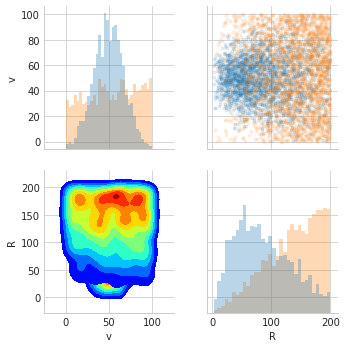

In [2]:
fnames = ["mock_tot_noMCMC_v001_{}.csv".format(str(i)) for i in range(50)]
tots = [pd.read_csv(fname) for fname in fnames]
mypairplot(tots[0],hue="kind",vars=("v","R"))

# No bias

## KI17

In [58]:
p_fnames = ["params_chain_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(50)]
log_fnames = ["mclog_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(50)]
prms = [pd.read_csv(fname) for fname in p_fnames]
logs = [pd.read_csv(fname) for fname in log_fnames]

,a,b,s,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.703120,1.209777,0.014364,0.452919,5000
2,0.706168,1.197219,0.014639,0.421318,5000
3,0.673484,1.109819,0.013758,0.458050,20000


,a,b,s,v_mem,logpdf
count,35001.000000,35001.000000,35001.000000,35001.000000,35001.000000
mean,9.770301,9.678776,0.503570,50.042694,-48667.990648
std,0.665316,1.125583,0.014082,0.438675,1.488467
min,7.269044,5.525918,0.452840,48.451564,-48676.531167
25%,9.337382,8.919351,0.494100,49.756882,-48668.713770
50%,9.760774,9.669282,0.503577,50.041903,-48667.652373
75%,10.207811,10.405449,0.512994,50.328384,-48666.896965
max,12.366670,14.078268,0.565019,51.659637,-48665.926856


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

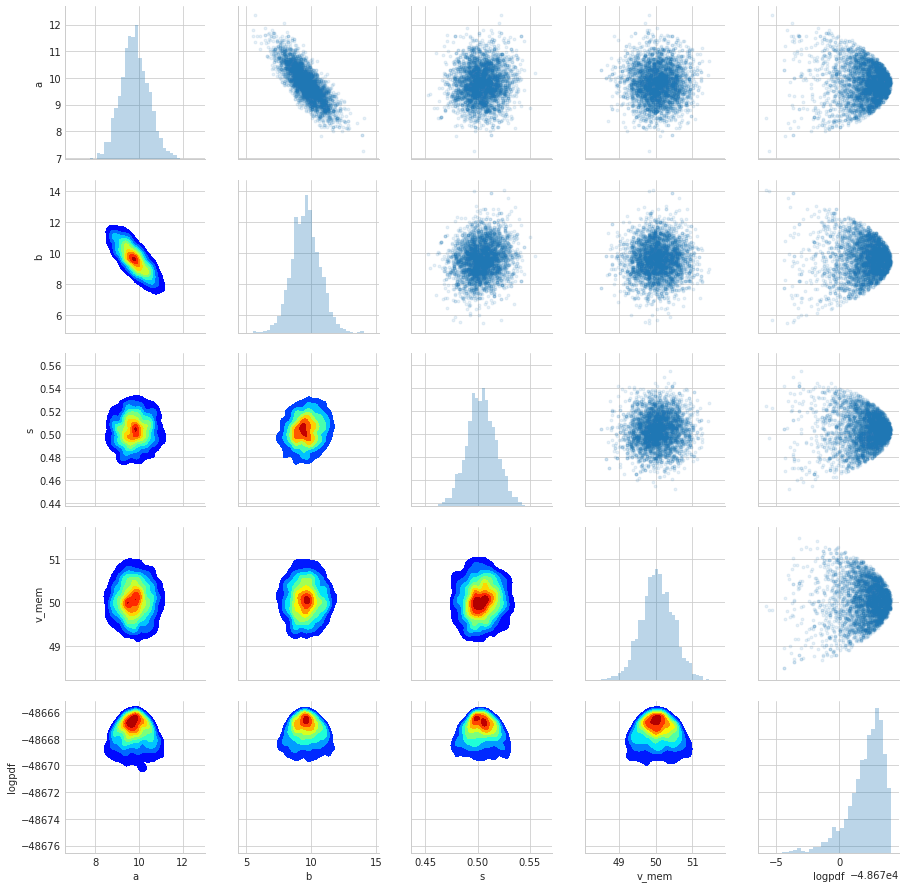

In [10]:
# for example,
ind = 0
display(logs[ind])
display(prms[ind].describe())
mypairplot(prms[ind][-20000::5])

In [59]:
s_list = pd.DataFrame()
for i in range(50):
    s_list["s{}".format(str(i))] = prms[i].s[-20000:].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a45df10b8>,
      dtype=object)

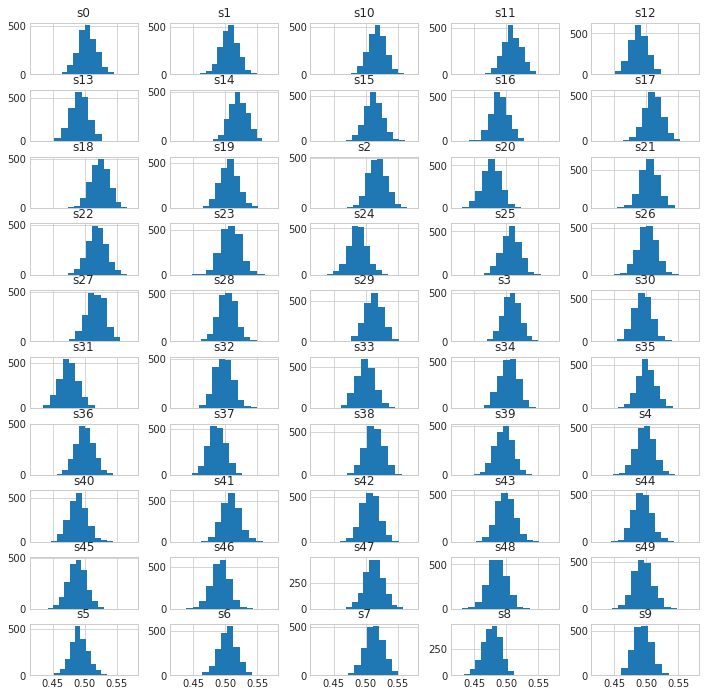

In [60]:
display(s_list[::10].hist(sharex=True,layout=(10,5),figsize=(12,12)))

In [45]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
means[r"$\mathrm{logit}(s)$"] = np.log(stats.s/(1-stats.s))
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

mean properties


,a,b,s,v_mem,logpdf,$\mathrm{logit}(s)$
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,10.042098,10.033513,0.501265,49.988012,-48708.565437,0.005059
std,0.693833,1.246647,0.011730,0.469432,28.646525,0.046941
min,8.479477,7.115543,0.474712,48.949860,-48774.971662,-0.101237
16%,9.388874,8.948528,0.489340,49.483900,-48738.532853,-0.042645
50%,10.062844,9.979334,0.501968,50.004277,-48707.703762,0.007871
84%,10.625909,11.154534,0.512753,50.454258,-48679.124954,0.051024
max,11.901283,12.505654,0.522832,51.249136,-48652.086102,0.091392


stds properties


,a,b,s,v_mem,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.721572,1.214442,0.013991,0.455356,1.413481
std,0.045887,0.077223,0.000263,0.017047,0.033990
min,0.619315,1.081620,0.013351,0.416349,1.356028
16%,0.677843,1.149884,0.013737,0.438811,1.373257
50%,0.719494,1.202984,0.013954,0.457216,1.416024
84%,0.760209,1.287486,0.014258,0.470724,1.440731
max,0.835627,1.381720,0.014553,0.485817,1.491701


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a4603a7b8>,
      dtype=object)

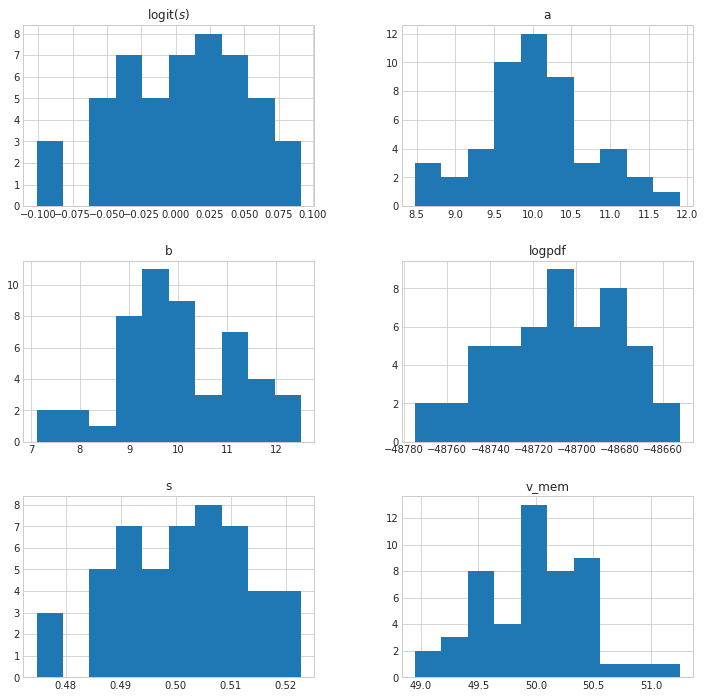

In [53]:
print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))

## modKI17

In [61]:
p_fnames = ["params_chain_modKI17_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(50)]
log_fnames = ["mclog_modKI17_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(50)]
prms = [pd.read_csv(fname) for fname in p_fnames]
logs = [pd.read_csv(fname) for fname in log_fnames]

,a,b,sigma_fg_normed,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.726946,1.436190,0.103184,0.475415,5000
2,0.706341,1.362526,0.102149,0.445784,5000
3,0.652687,1.363722,0.110082,0.435701,20000


,v_mem,a,b,sigma_fg_normed,logpdf
count,35001.000000,35001.000000,35001.000000,35001.000000,35001.000000
mean,50.109959,10.187341,8.952541,0.840972,-22427.013312
std,0.457475,0.692425,1.368984,0.112560,1.433652
min,48.612797,7.218854,3.934253,0.468585,-22438.728473
25%,49.801647,9.716706,8.022264,0.760204,-22427.719004
50%,50.108433,10.194406,8.938032,0.839272,-22426.678590
75%,50.417977,10.656779,9.874280,0.918607,-22425.979711
max,52.302851,12.486802,15.388860,1.295466,-22424.997966


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

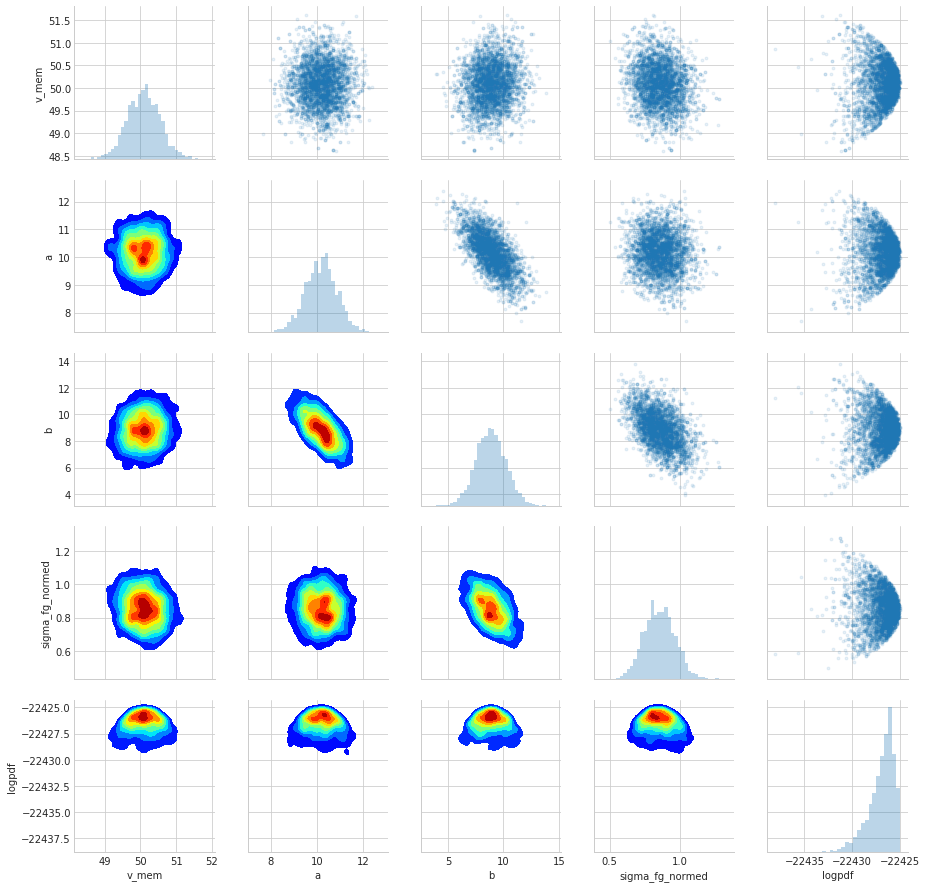

In [62]:
# for example,
ind = 2
display(logs[ind])
display(prms[ind].describe())
mypairplot(prms[ind][-20000::5])

In [20]:
sigma_fg_normed_list = pd.DataFrame()
for i in range(50):
    sigma_fg_normed_list["s{}".format(str(i))] = prms[i].sigma_fg_normed[-20000:].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a35565ac8>,
      dtype=object)

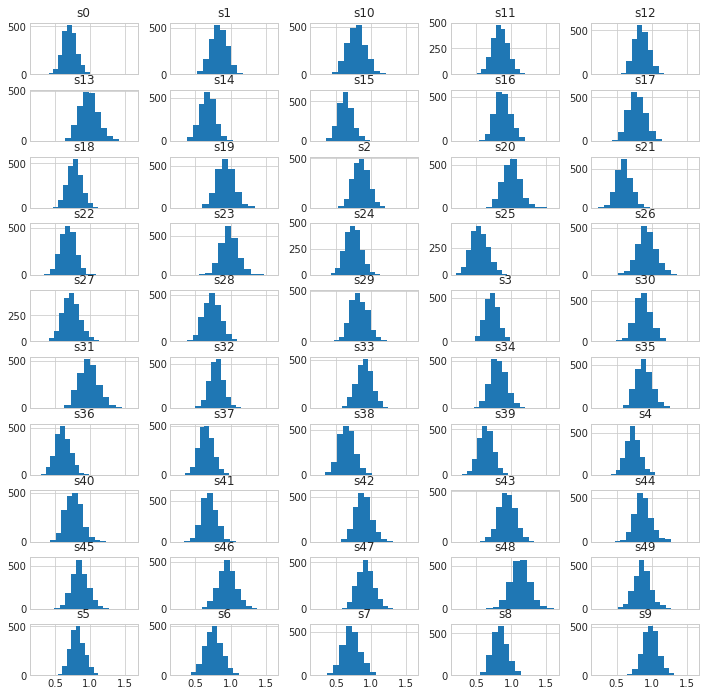

In [19]:
display(sigma_fg_normed_list[::10].hist(sharex=True,layout=(10,5),figsize=(12,12)))

In [56]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
means[r"$\log\tilde{\sigma}_\mathrm{fg}$"] = np.log(means.sigma_fg_normed)
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

mean properties


,v_mem,a,b,sigma_fg_normed,logpdf,$\log\tilde{\sigma}_\mathrm{fg}$
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,49.982918,10.008743,10.066599,0.809713,-22458.498127,-0.222287
std,0.477025,0.699997,1.685205,0.121293,28.444132,0.152304
min,48.911799,8.406275,5.714310,0.556166,-22525.535653,-0.586688
16%,49.462769,9.383713,8.498898,0.684345,-22490.417665,-0.379308
50%,49.994987,9.982548,9.961583,0.827812,-22457.343112,-0.188970
84%,50.455401,10.596941,11.690032,0.924824,-22426.412288,-0.078165
max,51.304570,11.862955,14.346455,1.121350,-22400.187808,0.114534


stds properties


,v_mem,a,b,sigma_fg_normed,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.458956,0.718931,1.458217,0.116623,1.451354
std,0.016294,0.042802,0.128795,0.011097,0.064546
min,0.423362,0.624289,1.179055,0.095465,1.329596
16%,0.443846,0.686159,1.346078,0.106236,1.396449
50%,0.460853,0.719198,1.443214,0.116274,1.440869
84%,0.474286,0.761634,1.569022,0.129376,1.507116
max,0.496315,0.848274,1.875700,0.143434,1.648772


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a45db4550>,
      dtype=object)

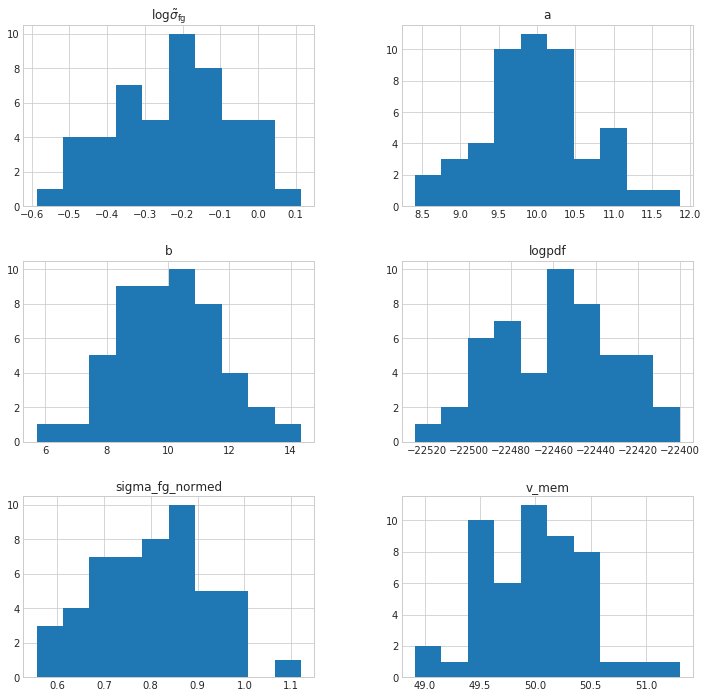

In [57]:
print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))

,v_mem,a,b,sigma_fg_normed,logpdf,$\log\tilde{\sigma}_\mathrm{fg}$
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,49.982918,10.008743,10.066599,0.809713,-22458.498127,-0.222287
std,0.477025,0.699997,1.685205,0.121293,28.444132,0.152304
min,48.911799,8.406275,5.714310,0.556166,-22525.535653,-0.586688
16%,49.462769,9.383713,8.498898,0.684345,-22490.417665,-0.379308
50%,49.994987,9.982548,9.961583,0.827812,-22457.343112,-0.188970
84%,50.455401,10.596941,11.690032,0.924824,-22426.412288,-0.078165
max,51.304570,11.862955,14.346455,1.121350,-22400.187808,0.114534


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0a37a781d0>,
      dtype=object)

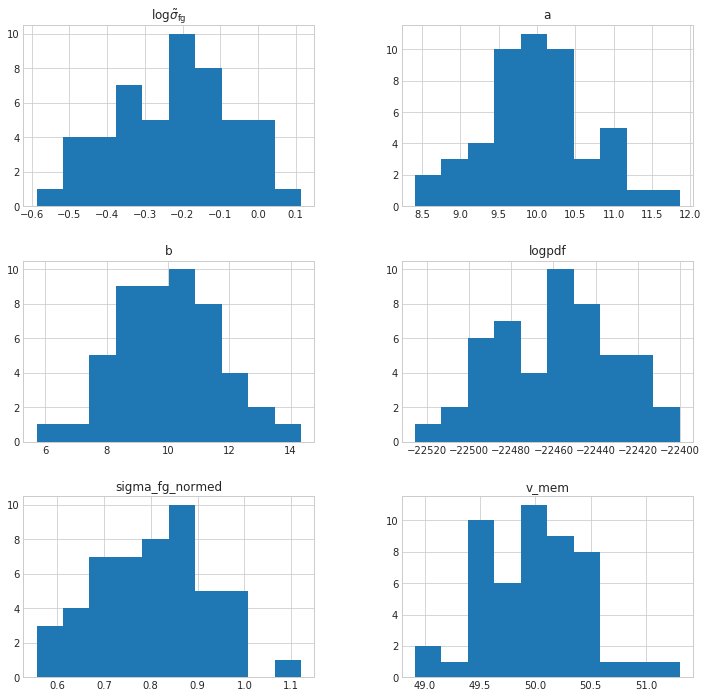

In [38]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
means[r"$\mathrm{logit}(s)$"] = np.log(stats.s/(1-stats.s))
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))

# Centered bias

## KI17

In [15]:
p_fnames = ["params_chain_noMCMC_plummerlike_tot_v001_{}.csv".format(str(i)) for i in range(50)]
log_fnames = ["mclog_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(50)]
prms = [pd.read_csv(fname) for fname in p_fnames]
logs = [pd.read_csv(fname) for fname in log_fnames]

,a,b,s,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.811165,1.394474,0.013154,0.444963,5000
2,0.703616,1.221904,0.013213,0.469978,5000
3,0.687005,1.140933,0.012813,0.444551,20000


,v_mem,a,b,s,logpdf
count,35001.000000,35001.000000,35001.000000,35001.000000,35001.000000
mean,51.053416,9.542679,27.448508,0.991452,-14274.316984
std,0.660453,1.074265,3.170218,0.017098,10.113922
min,48.795129,5.652360,9.764030,0.500000,-14609.629887
25%,50.608568,8.848599,25.891674,0.988719,-14274.442859
50%,51.072591,9.491248,27.625780,0.994013,-14273.339030
75%,51.490285,10.140685,29.351704,0.997306,-14272.589180
max,53.127937,14.424551,41.576958,0.999999,-14271.231289


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

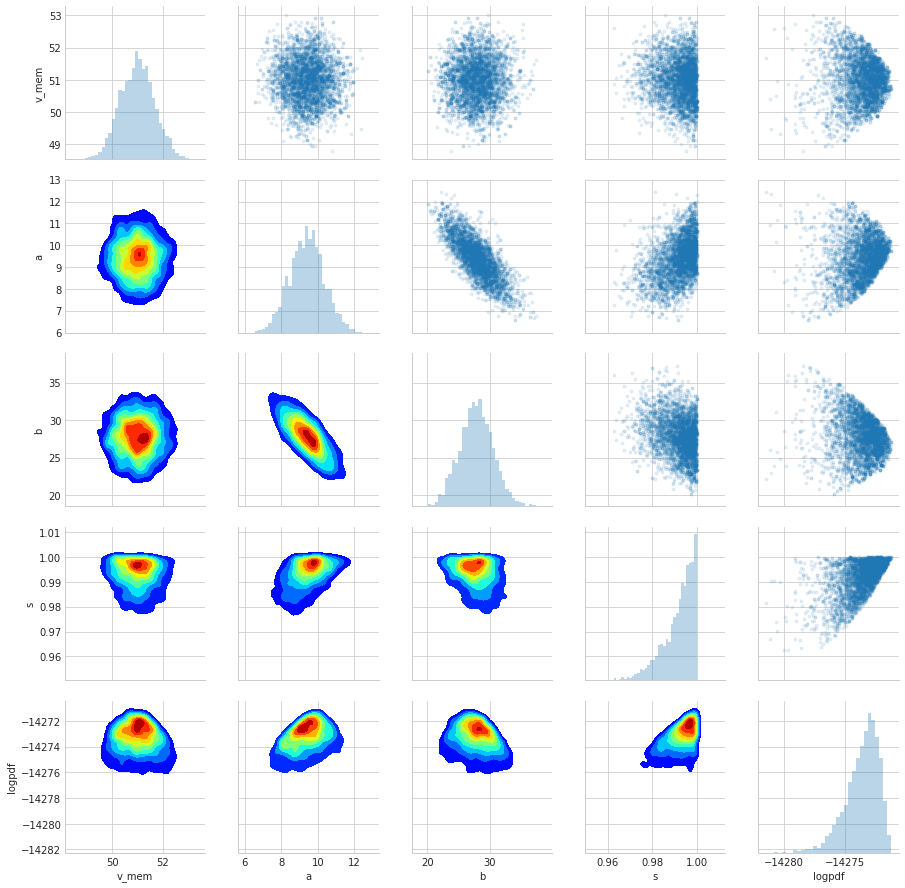

In [21]:
# for example,
ind = 2
display(logs[ind])
display(prms[ind].describe())
mypairplot(prms[ind][-20000::5])

In [16]:
s_list = pd.DataFrame()
for i in range(40):
    s_list["s{}".format(str(i))] = prms[i].s[-20000:].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4f22098ba8>,
      dtype=object)

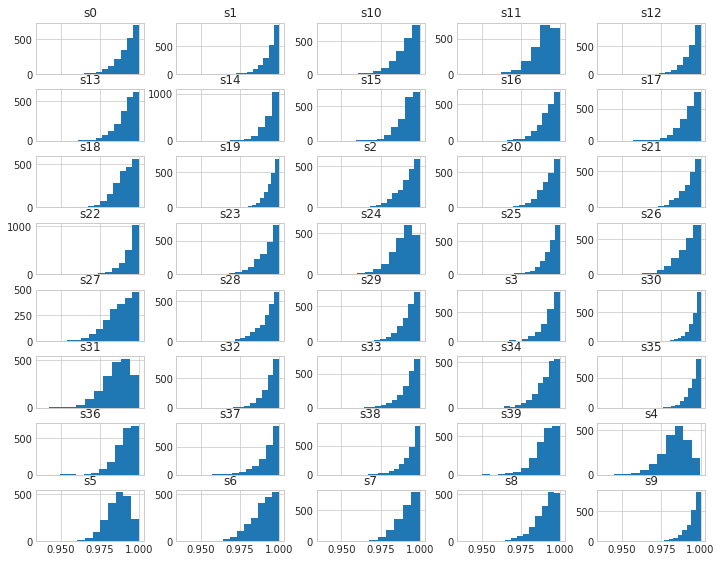

In [18]:
display(s_list[::10].hist(sharex=True,layout=(10,5),figsize=(12,12)))

In [19]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
#means[r"$\mathrm{logit}(s)$"] = np.log(stats.s/(1-stats.s))
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

mean properties


,v_mem,a,b,s,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,51.103956,9.672458,25.961177,0.991168,-14264.494839
std,0.350069,0.636846,2.011486,0.002386,12.735698
min,50.362275,8.186363,22.218985,0.984341,-14288.685977
16%,50.753727,9.056392,24.156862,0.988853,-14278.868834
50%,51.091052,9.749164,25.550155,0.991639,-14265.223481
84%,51.383782,10.172443,27.595465,0.993249,-14250.024741
max,51.766356,11.251389,31.222015,0.994785,-14237.328908


stds properties


,v_mem,a,b,s,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.652310,1.124662,3.310786,0.018603,11.260186
std,0.020753,0.127717,0.347118,0.001152,0.904231
min,0.603106,0.866230,2.630675,0.016283,9.315560
16%,0.630873,1.009969,3.008593,0.017283,10.450131
50%,0.651898,1.118256,3.294612,0.018762,11.139976
84%,0.673495,1.221667,3.652065,0.019660,11.991580
max,0.700417,1.463485,4.187645,0.020873,13.464500


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

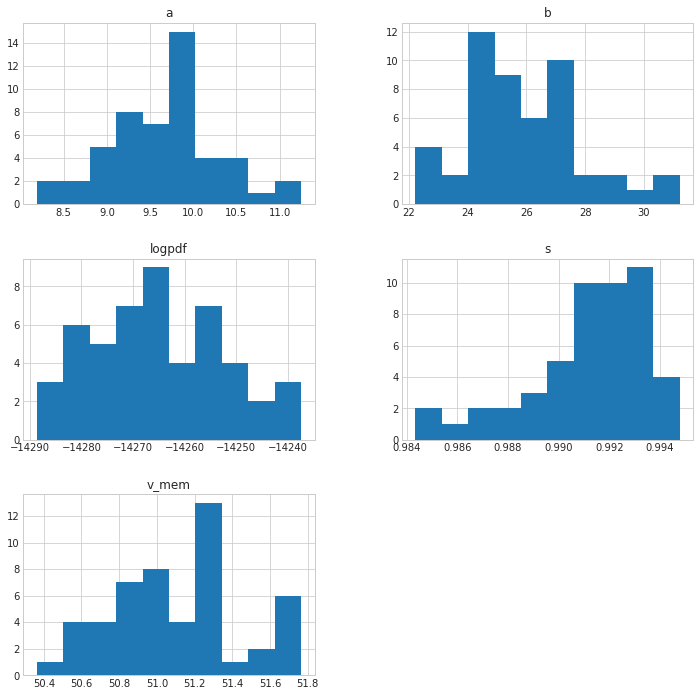

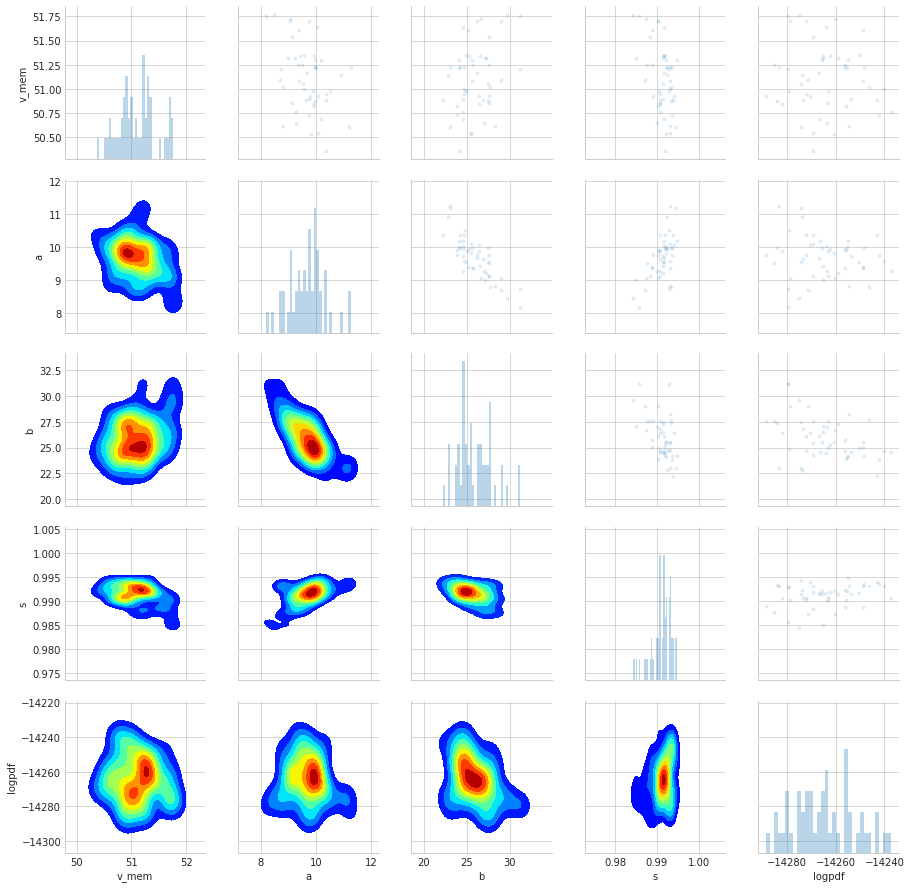

In [22]:
print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))
mypairplot(means)

## mod KI17

In [33]:
p_fnames = ["params_chain_modKI17_noMCMC_plummerlike_tot_v001_{}.csv".format(str(i)) for i in range(50)]
log_fnames = ["mclog_modKI17_noMCMC_plummerlike_tot_v001_{}.csv".format(str(i)) for i in range(50)]
prms = [pd.read_csv(fname)[-20000::5] for fname in p_fnames]
logs = [pd.read_csv(fname) for fname in log_fnames]

,a,b,sigma_fg_normed,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.652507,2.095978,0.136114,0.555886,5000
2,0.924588,2.144236,0.127154,0.594100,5000
3,0.967650,2.371832,0.139468,0.614191,20000


,a,b,sigma_fg_normed,v_mem,logpdf
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,10.168683,10.365432,0.724817,50.147846,-6586.006042
std,0.869083,2.167576,0.137503,0.588398,1.423027
min,6.963204,2.461293,0.342605,48.041755,-6596.388182
25%,9.590713,8.910483,0.628245,49.757477,-6586.739216
50%,10.152164,10.298060,0.722073,50.152699,-6585.652262
75%,10.727755,11.736527,0.814247,50.554760,-6584.974841
max,14.347827,20.176998,1.270864,52.326234,-6584.015002


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

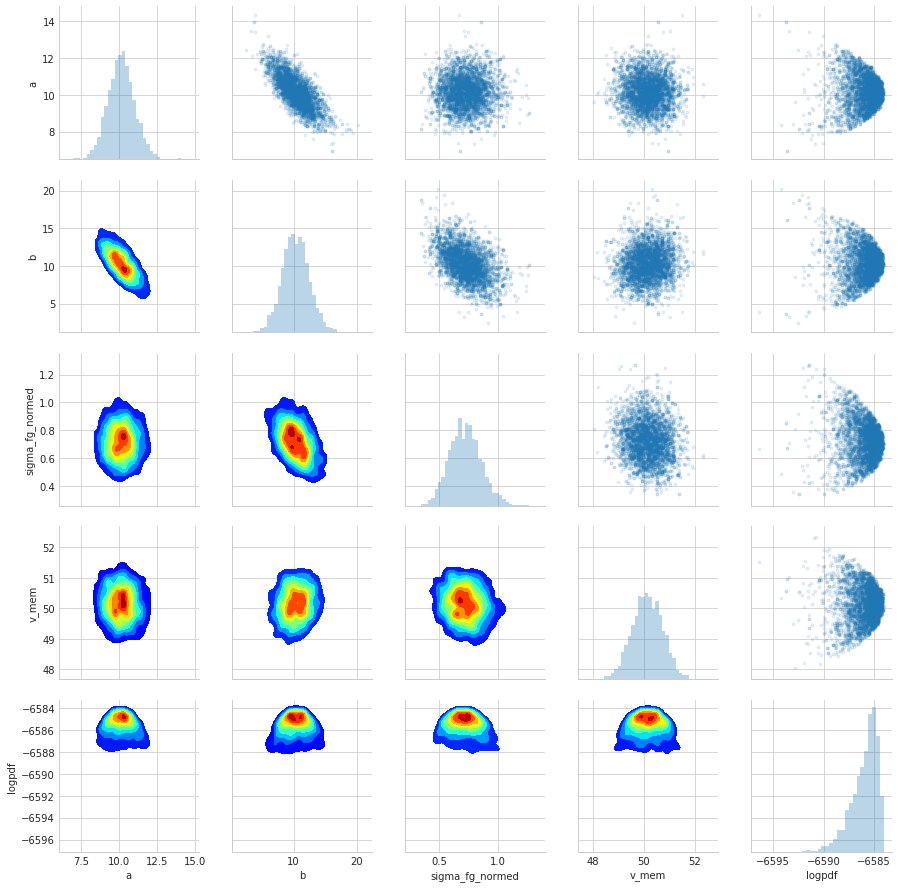

In [34]:
# for example,
ind = 2
display(logs[ind])
display(prms[ind].describe())
mypairplot(prms[ind])

In [35]:
s_list = pd.DataFrame()
for i in range(40):
    s_list["s{}".format(str(i))] = prms[i].sigma_fg_normed[-20000:].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f682b88a048>,
      dtype=object)

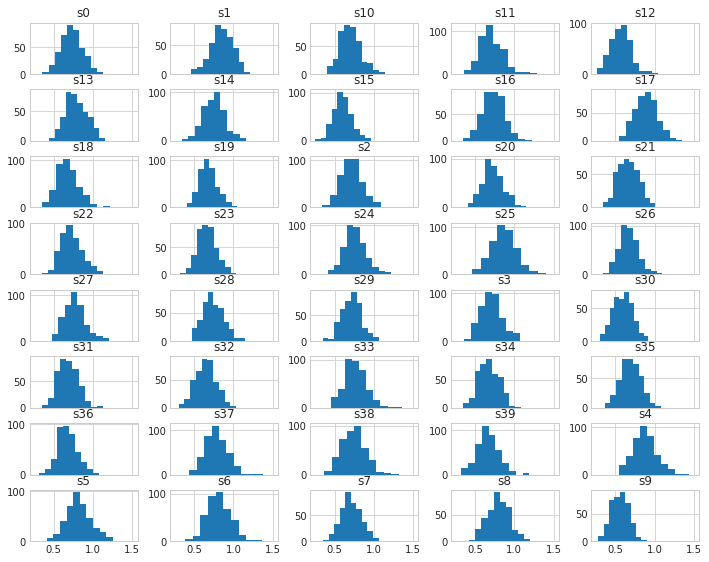

In [36]:
display(s_list[::10].hist(sharex=True,layout=(10,5),figsize=(12,12)))

In [37]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
#means[r"$\mathrm{logit}(s)$"] = np.log(stats.s/(1-stats.s))
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

mean properties


,a,b,sigma_fg_normed,v_mem,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,9.906111,9.879757,0.731060,50.122433,-6571.885723
std,0.450739,1.407219,0.079915,0.355462,14.394109
min,8.828498,5.498717,0.560556,49.484745,-6599.432669
16%,9.403490,8.671279,0.661502,49.799609,-6586.096104
50%,9.922343,9.959321,0.727317,50.117565,-6572.924603
84%,10.304788,11.159075,0.805113,50.451319,-6557.161266
max,11.011686,13.215321,0.923735,50.994335,-6535.231525


stds properties


,a,b,sigma_fg_normed,v_mem,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.853425,2.001496,0.134545,0.577594,1.424677
std,0.035076,0.125471,0.009820,0.017385,0.046123
min,0.779356,1.761779,0.113409,0.532035,1.319023
16%,0.817231,1.878826,0.124182,0.564760,1.385423
50%,0.852767,1.980386,0.135676,0.579153,1.420705
84%,0.884507,2.113738,0.143921,0.592372,1.466701
max,0.934459,2.272917,0.158942,0.616865,1.532616


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

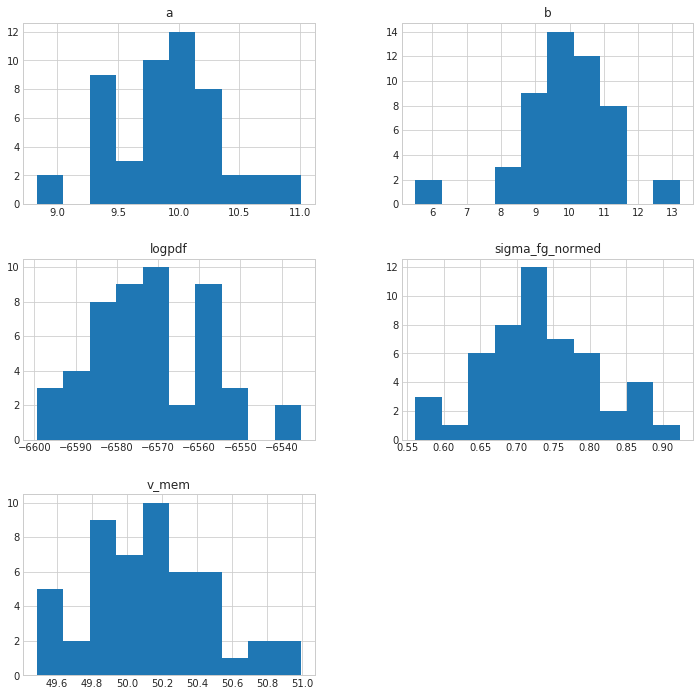

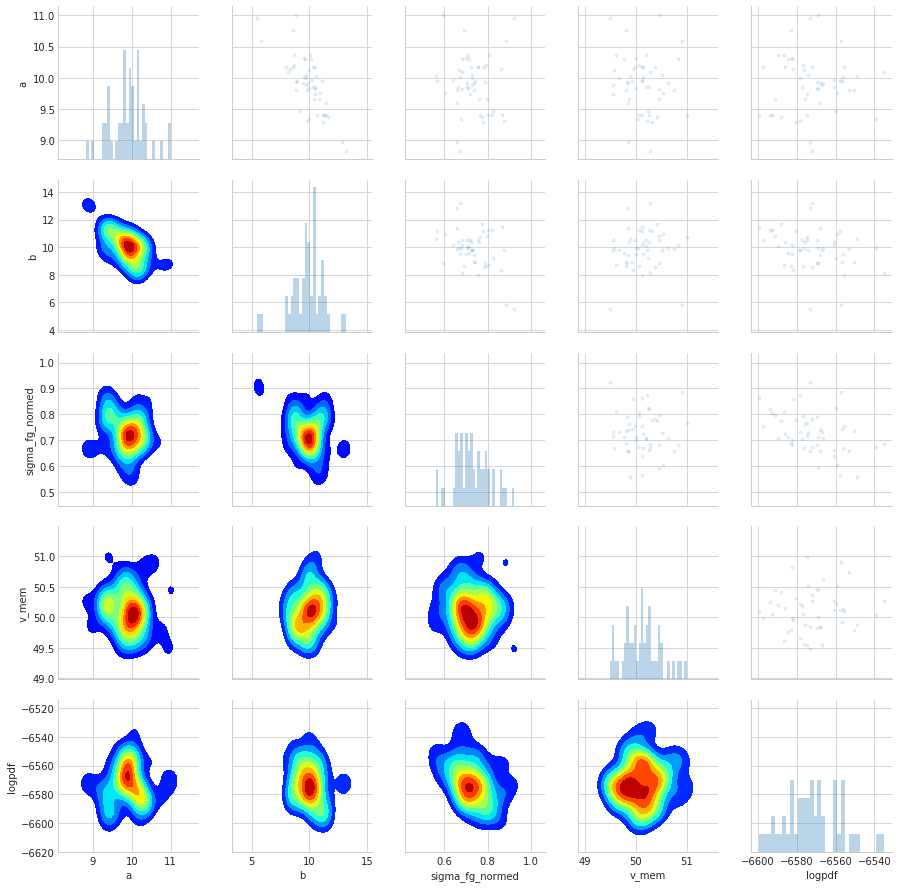

In [38]:
print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))
mypairplot(means)

# flatten bias

## KI17

In [27]:
n_mock = 50
p_fnames = ["params_chain_noMCMC_flatten_tot_v001_{}.csv".format(str(i)) for i in range(n_mock)]
#log_fnames = ["mclog_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(10)]
prms = [pd.read_csv(fname)[-20000::5] for fname in p_fnames]
#logs = [pd.read_csv(fname) for fname in log_fnames]

,a,b,sigma_fg_normed,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.652507,2.095978,0.136114,0.555886,5000
2,0.924588,2.144236,0.127154,0.594100,5000
3,0.967650,2.371832,0.139468,0.614191,20000


,v_mem,a,b,s,logpdf
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,48.740378,7.526069,4.734214,0.151914,-22718.955251
std,1.111798,1.548079,2.062745,0.015028,1.414413
min,44.540610,2.049083,-3.160224,0.093209,-22729.217961
25%,47.983017,6.465438,3.347452,0.141607,-22719.622810
50%,48.743932,7.504178,4.706239,0.151827,-22718.643034
75%,49.492207,8.500246,6.117114,0.161835,-22717.921290
max,52.566850,13.780088,14.477112,0.215705,-22717.047527


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

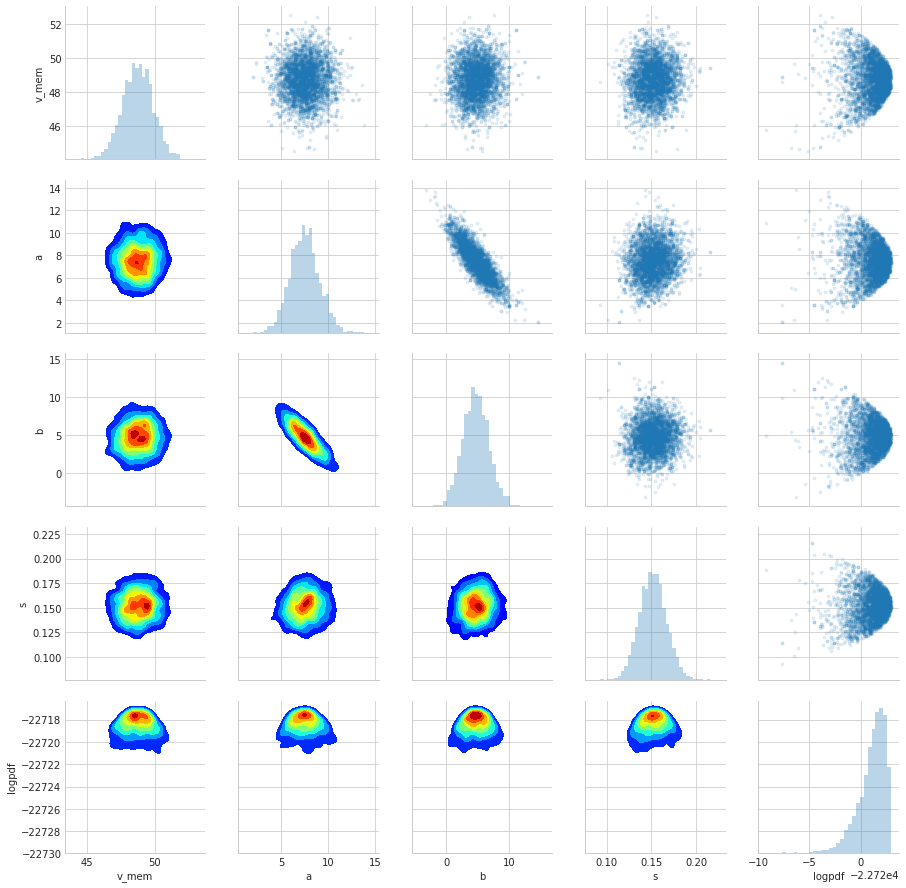

In [28]:
# for example,
ind = 2
display(logs[ind])
display(prms[ind].describe())
mypairplot(prms[ind])

In [29]:
s_list = pd.DataFrame()
for i in range(n_mock):
    s_list["s{}".format(str(i))] = prms[i].s[-20000:].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f682d5459b0>,
      dtype=object)

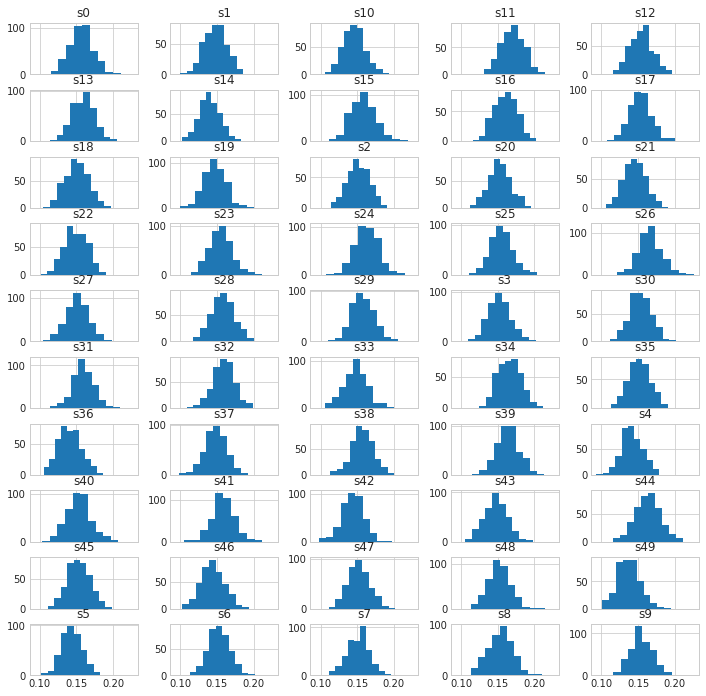

In [30]:
display(s_list[::10].hist(sharex=True,layout=(10,5),figsize=(12,12)))

In [31]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
#means[r"$\mathrm{logit}(s)$"] = np.log(stats.s/(1-stats.s))
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

mean properties


,v_mem,a,b,s,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,49.333102,8.749368,3.181368,0.153058,-22713.860536
std,0.828179,1.017531,1.252974,0.007001,7.578238
min,47.899556,5.972301,1.261712,0.137331,-22728.604875
16%,48.681802,7.907099,2.059546,0.146688,-22720.435972
50%,49.274787,8.844253,2.995629,0.153126,-22713.890084
84%,50.123228,9.845075,4.425138,0.158954,-22705.858806
max,51.563428,10.422100,7.803307,0.171179,-22701.667431


stds properties


,v_mem,a,b,s,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.141890,1.563018,2.093826,0.015433,1.427709
std,0.081643,0.113827,0.170069,0.000461,0.051905
min,0.967835,1.325475,1.805637,0.014439,1.291828
16%,1.047038,1.452481,1.936382,0.015053,1.387545
50%,1.142107,1.570067,2.070825,0.015313,1.429455
84%,1.228576,1.653497,2.198280,0.015846,1.471709
max,1.305045,1.859130,2.692307,0.016708,1.552817


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

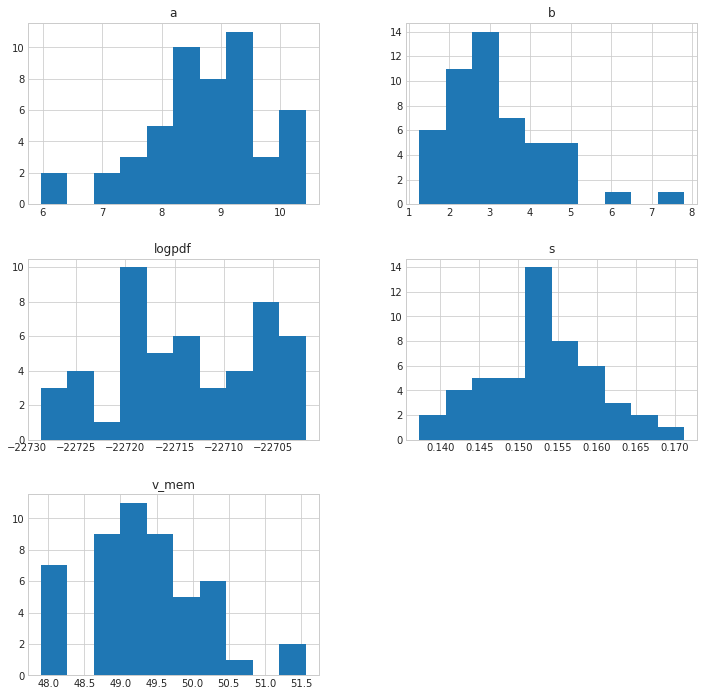

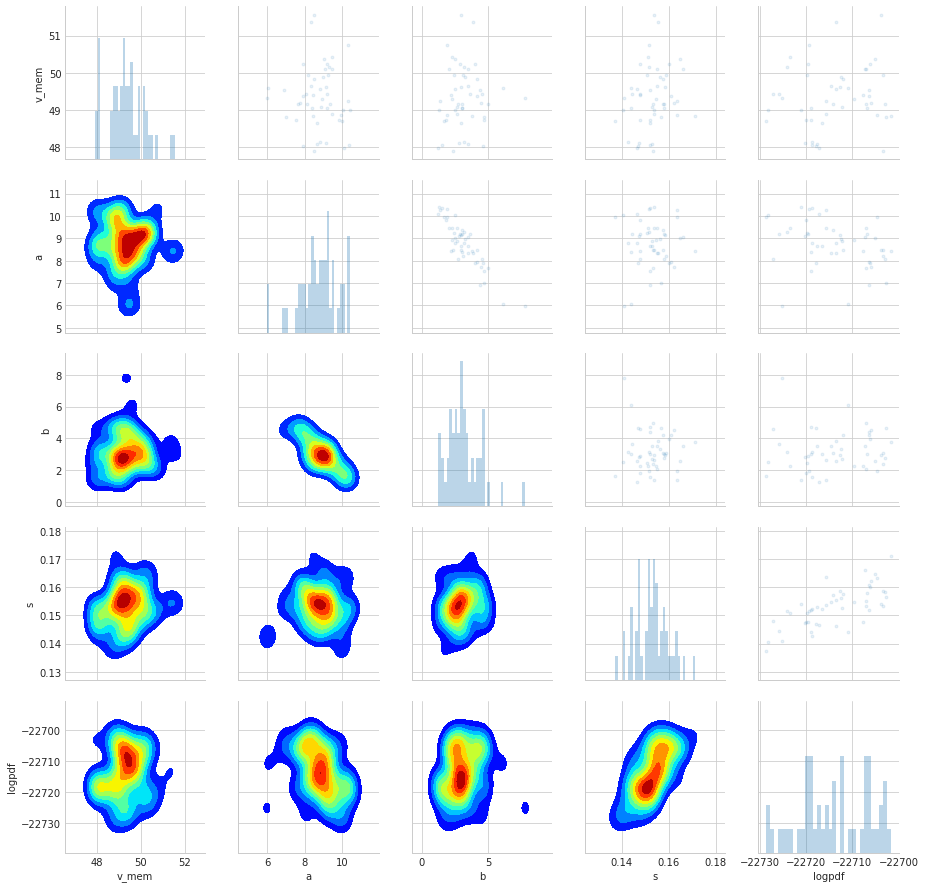

In [32]:
print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))
mypairplot(means)

## modKI17

In [19]:
n_mock = 50
p_fnames = ["params_chain_modKI17_noMCMC_flatten_tot_v001_{}.csv".format(str(i)) for i in range(n_mock)]
#log_fnames = ["mclog_noMCMC_tot_v001_{}.csv".format(str(i)) for i in range(10)]
prms = [pd.read_csv(fname)[-20000::5] for fname in p_fnames]
#logs = [pd.read_csv(fname) for fname in log_fnames]

,a,b,sigma_fg_normed,v_mem,iter_num
0,0.200000,0.200000,0.010000,0.200000,5000
1,0.652507,2.095978,0.136114,0.555886,5000
2,0.924588,2.144236,0.127154,0.594100,5000
3,0.967650,2.371832,0.139468,0.614191,20000


,a,b,sigma_fg_normed,v_mem,logpdf
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,9.476322,10.082429,0.796028,49.417071,-10671.884601
std,1.547746,2.392565,0.197072,0.900664,1.405724
min,3.784285,3.479178,0.160943,46.266571,-10682.762859
25%,8.401789,8.365585,0.661177,48.824806,-10672.533756
50%,9.469186,9.981449,0.786465,49.431568,-10671.562232
75%,10.516468,11.667844,0.931162,49.998220,-10670.865467
max,15.300205,20.031661,1.705068,52.623490,-10669.924308


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

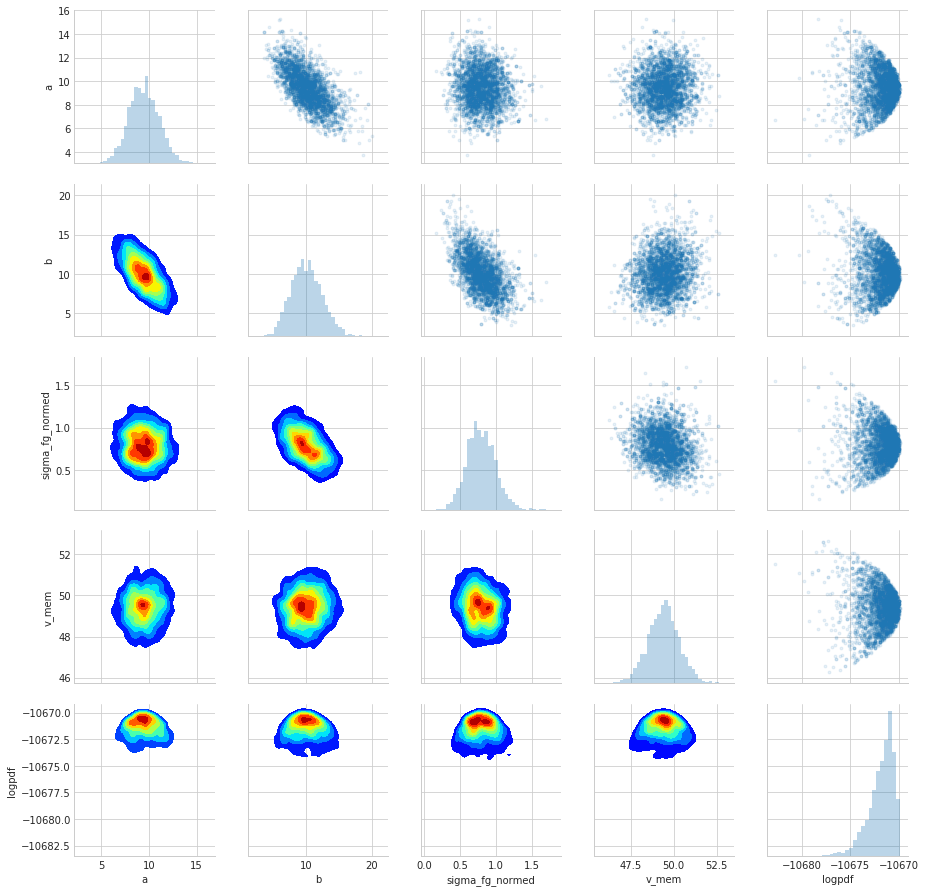

In [22]:
# for example,
ind = 2
display(logs[ind])
display(prms[ind].describe())
mypairplot(prms[ind])

In [23]:
s_list = pd.DataFrame()
for i in range(n_mock):
    s_list["s{}".format(str(i))] = prms[i].sigma_fg_normed[-20000:].values

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f682dddde48>,
      dtype=object)

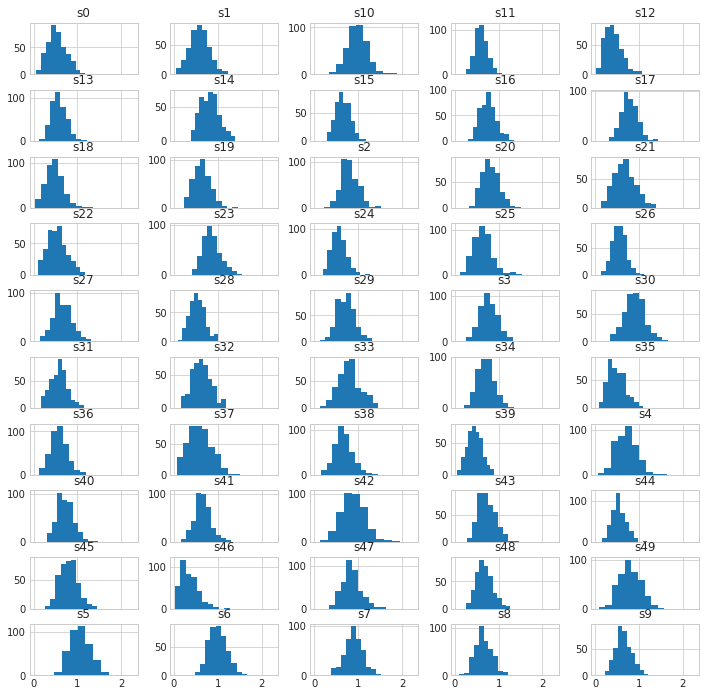

In [24]:
display(s_list[::10].hist(sharex=True,layout=(10,5),figsize=(12,12)))

In [25]:
means = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["mean"] for df in prms])
#means[r"$\mathrm{logit}(s)$"] = np.log(stats.s/(1-stats.s))
stds = pd.DataFrame([df.describe(percentiles=(0.16,0.5,0.84)).loc["std"] for df in prms])

mean properties


,a,b,sigma_fg_normed,v_mem,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,9.407497,11.330856,0.687384,50.012723,-10666.691018
std,1.130164,2.040745,0.152649,0.651840,11.883316
min,6.088950,7.779687,0.349888,48.559791,-10692.521835
16%,8.355145,9.249025,0.544478,49.456308,-10678.964563
50%,9.516839,11.049878,0.662628,49.951261,-10665.905544
84%,10.630049,13.144265,0.821847,50.567540,-10654.057504
max,11.191419,17.769604,1.057177,51.730732,-10639.005125


stds properties


,a,b,sigma_fg_normed,v_mem,logpdf
count,50.000000,50.000000,50.000000,50.000000,50.000000
mean,1.469910,2.753855,0.201297,0.908795,1.422813
std,0.134789,0.364653,0.026347,0.060301,0.055182
min,1.125663,2.124440,0.147394,0.777075,1.323457
16%,1.349153,2.409094,0.180497,0.847728,1.364414
50%,1.470308,2.692237,0.199612,0.907953,1.425969
84%,1.596584,3.121505,0.229530,0.963014,1.479828
max,1.748245,3.853839,0.264538,1.052740,1.575727


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

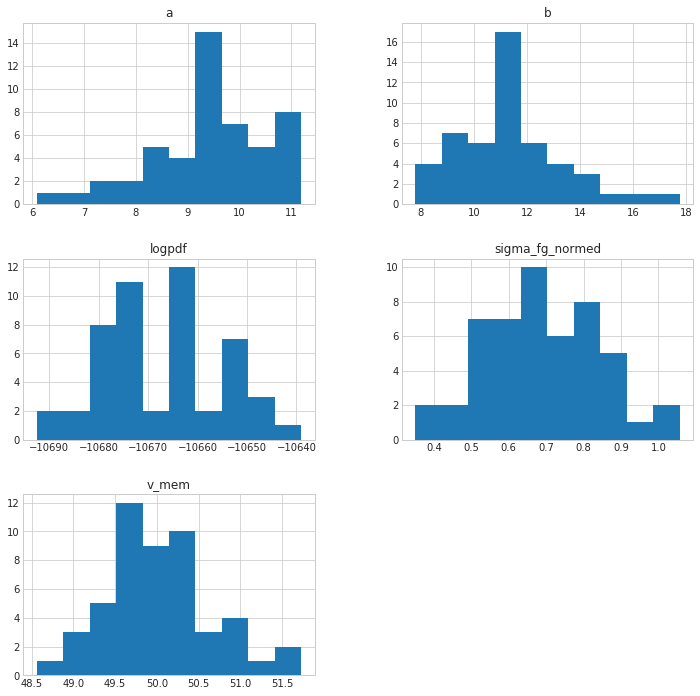

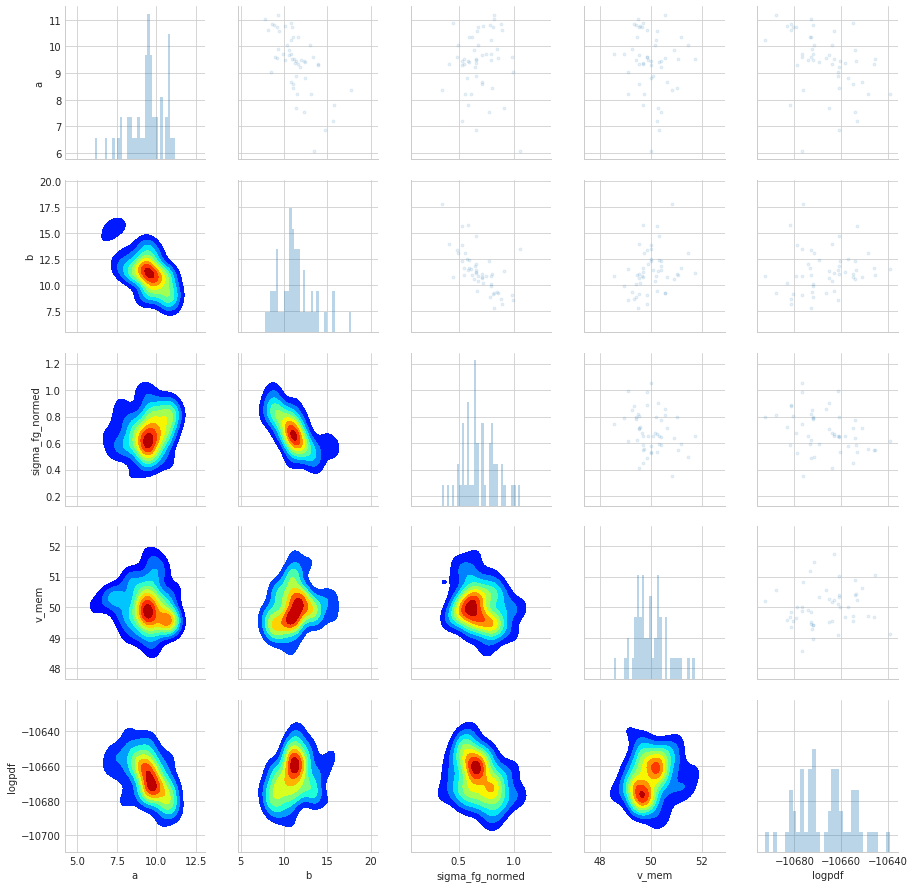

In [26]:
print("mean properties")
display(means.describe(percentiles=(0.16,0.5,0.84)))
print("stds properties")
display(stds.describe(percentiles=(0.16,0.5,0.84)))
means.hist(layout=(3,2),figsize=(12,12))
mypairplot(means)

# Note

なんでどっちの場合も$\tilde{\Sigma}_\mathrm{FG}$が少なくなる？

Fullの場合にはまともな結果を出しているので、コードは間違ってなさそう。

サンプリングの仕方にBiasがかかっている？
簡単な例として、$\mathrm{RoI}_{R}$を$R_0$で二分割してサンプリングしてきたとする。
この時、理想的には（$N\to\infty$）得られるサンプルの分布は
$$f_i(v,R) = \frac{s f_\mathrm{Mem}(v,R)+(1-s) f_\mathrm{FG}(v,R)}{\int_{\mathrm{RoI}_i} {dv}{dR}{s f_\mathrm{Mem}(v,R)+(1-s) f_\mathrm{FG}(v,R)}}$$に従う。ここで分割されたRoIを${\mathrm{RoI}_i}$と書いた。

このとき、点$R$における条件付き確率（条件付き分布？）を考えると、
$$ p_i(v|R) =  \frac{f_i(v,R)}{\int_{\mathrm{RoI}_v}dv f_i(v,R)}$$
となっている。これが分割される前の条件付き分布
$$p(v|R) =  \frac{s f_\mathrm{Mem}(v,R)+(1-s) f_\mathrm{FG}(v,R)}{\int_{\mathrm{RoI}_v}dv s f_\mathrm{Mem}(v,R)+(1-s) f_\mathrm{FG}(v,R)}$$
と等しければ良い。。。がこれは明らかに等しい。。。

ん？今コード中で　biased_sampling を定義するときに random.sample を使ってsamplingしてるのだけど、これは。。。
まずいのでは？重複なしだと選ばれなかったやつを過剰に小さく見積もることになる気がする。
例えば、10個の赤いボールと90個の白いボールがあるとする。ここから重複ありでボールをサンプリングしてきたら、
サンプルされたボールの分布は1:9になるであろう。
しかし重複なしでサンプルされた場合は・・・？

やってみよう。まずサンプルする関数を定義する：

In [65]:
import random

def test_sampling(n_sampled=50,n_mock=10000):
    balls = ["red"]*10 + ["white"]*90
    choices_list = [random.choices(balls,k=n_sampled) for i in range(n_mock)]
    sample_list = [random.sample(balls,k=n_sampled) for i in range(n_mock)]

    s_choices_list = [l.count("red")/n_sampled for l in choices_list] #重複あり
    s_sample_list = [l.count("red")/n_sampled for l in sample_list] #重複なし

    return plt.hist((s_choices_list,s_sample_list),align="left",label=("choices","sample"),alpha=0.3,histtype="stepfilled"),plt.legend()

でサンプルしてみる。
histgramで表されるのは、n_sample個だけ重複あり・なしで取ってくるようなとり方をした時に、
実際にSampleされるRedの割合。
例えば１個しか取ってこない時：

(([array([9016.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           984.]),
   array([8977.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
          1023.])],
  array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
  <a list of 2 Lists of Patches objects>),
 <matplotlib.legend.Legend at 0x7fab01b24a20>)

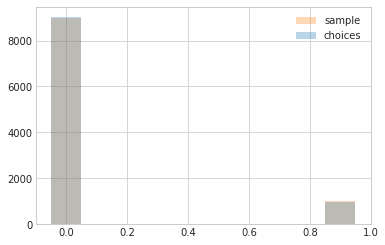

In [66]:
test_sampling(1)

当たり前だがほとんど変わらない。しかし、20個重複あり・なしでとってきてみると：

(([array([1.262e+03, 2.637e+03, 2.839e+03, 1.934e+03, 9.190e+02, 2.950e+02,
          9.100e+01, 1.600e+01, 6.000e+00, 1.000e+00]),
   array([9.450e+02, 2.703e+03, 3.088e+03, 2.167e+03, 8.240e+02, 2.240e+02,
          4.400e+01, 3.000e+00, 2.000e+00, 0.000e+00])],
  array([0.   , 0.045, 0.09 , 0.135, 0.18 , 0.225, 0.27 , 0.315, 0.36 ,
         0.405, 0.45 ]),
  <a list of 2 Lists of Patches objects>),
 <matplotlib.legend.Legend at 0x7fab0152a898>)

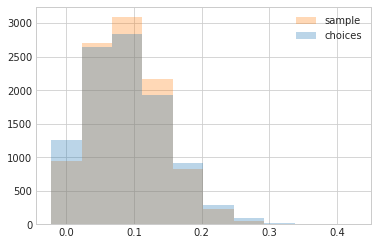

In [67]:
test_sampling(20)

だいぶ変わる。もちろん80個とかとってくれば

(([array([  25.,  333., 2626., 1444., 2827., 2195.,  415.,   93.,   38.,
             4.]),
   array([0.000e+00, 3.000e+00, 1.135e+03, 2.153e+03, 5.754e+03, 9.550e+02,
          0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])],
  array([0.   , 0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  ,
         0.225, 0.25 ]),
  <a list of 2 Lists of Patches objects>),
 <matplotlib.legend.Legend at 0x7fab01c3eb70>)

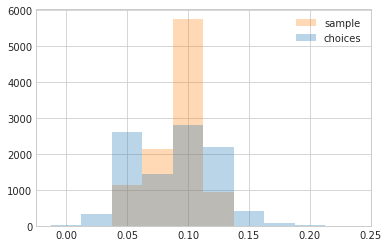

In [68]:
test_sampling(80)

だいぶ変わる。もちろん100個とかとってくれば

(([array([6.900e+01, 4.910e+02, 1.436e+03, 3.754e+03, 2.222e+03, 1.281e+03,
          6.390e+02, 9.000e+01, 1.500e+01, 3.000e+00]),
   array([    0.,     0.,     0., 10000.,     0.,     0.,     0.,     0.,
              0.,     0.])],
  array([0.01 , 0.033, 0.056, 0.079, 0.102, 0.125, 0.148, 0.171, 0.194,
         0.217, 0.24 ]),
  <a list of 2 Lists of Patches objects>),
 <matplotlib.legend.Legend at 0x7fab01962c88>)

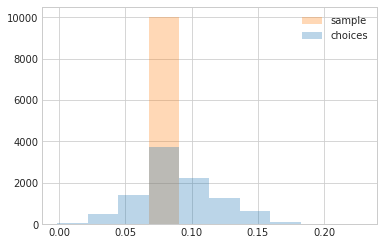

In [69]:
test_sampling(100)

こうなる。つまりとってくる数が母集団の数に近づくにつれ、平均値に極端なピークを持つ分布になる。
するとなにがまずいか…

真の分布じゃなくてたまたまサンプルされた分布にすごい近づく。

だからどうした。

## 他のSamplingでも試してみる。
よく考えると例えばFlatにとってきたような場合はMemがとても少ない（本来たくさんあるはずの内側にすら殆ど無い）し、
Plummerっぽくとってきたような場合はFGがとても少ない（本来FGがたくさんあるはずの外側にすら殆ど無い）。
そう考えるとMem/FG比がほとんど決まらないのは当然のような気がする。
じゃあ上の推定ではどの情報を元にこの値を決めているのか？
ｰ>たくさんあるところだろう。つまり
Plummerっぽくとってきた場合はほぼ中心部だけの情報から、
Flatにとってきた時はほぼ外側だけの情報から$\tilde{\Sigma}_\mathrm{FG}$を決めていると思って良さそう。
（これは他のパラメータも同じ。）

では中心部ないし外側にはどれくらいMem星、FG星がいるのか？

Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


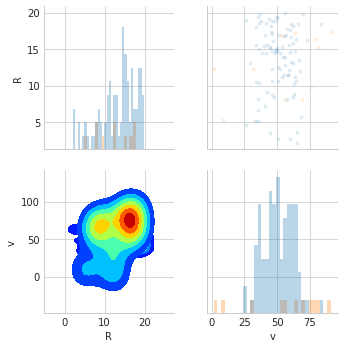

In [12]:
df = pd.read_csv("mock_tot_plummerlike_noMCMC_v001_0.csv",index_col=0)
mypairplot(df[df.R<20],hue="kind")

…でもよくよく考えると全然星がないわけじゃないのでそういうのでちゃんと決まっても良さそうなんだよな。

試しに、ごくごく少数のサンプルだけ用意したらどういう推定結果になるのか見てみたい気もする。

In [ ]:
import MCgenerator
import model_definition as model
from model_definition import initial_parameters_mem, initial_parameters_fg
from scipy.stats import norm as gauss
from scipy.stats import truncnorm as truncgauss

class KI17_loglikelihood_mod:
    def __init__(self,df):
        self.vs = df.v
        self.Rs = df.R
        print(self.vs)
        print(self.Rs)

    def __call__(self,v_mem,a,b,sigma_fg_normed):
        r_e,v_fg,dv_fg = initial_parameters_mem['r_e'],initial_parameters_fg['v_fg'],initial_parameters_fg['dv_fg']
        if a<0 or a+b*(model.RoI_R/r_e) < 0 or sigma_fg_normed<0:
            return -np.inf
        else:
            #fmem,ffg = model.dist_func_mem,model.dist_func_fg
            #loglikelis = np.log(s*fmem(self.vs,self.Rs,r_e,v_mem,a,b)+(1-s)*ffg(self.vs,self.Rs,v_fg,dv_fg))
            #return np.sum(loglikelis)
            scale_mem = a+(self.Rs/r_e)*b
            args_mem = {
                'a': (model.RoI_v_lo-v_mem)/scale_mem, 
                'b': (model.RoI_v_hi-v_mem)/scale_mem,
                'loc': v_mem, 'scale': scale_mem}
            args0_mem = {
                'a': (model.RoI_v_lo-v_mem)/(a+b), 
                'b': (model.RoI_v_hi-v_mem)/(a+b),
                'loc': v_mem, 'scale': a+b}
            args_fg = {
                'a': (model.RoI_v_lo-v_fg)/dv_fg, 
                'b': (model.RoI_v_hi-v_fg)/dv_fg,
                'loc':v_fg, 'scale':dv_fg}
            sigma_mem_normed = (1/(1+(self.Rs/r_e)**2)**2) / (1/((1+(1)**2)**2))
            G_mem_normed = (gauss.cdf(model.RoI_v_hi,loc=v_mem,scale=scale_mem)-gauss.cdf(model.RoI_v_lo,loc=v_mem,scale=scale_mem))/(gauss.cdf(model.RoI_v_hi,loc=v_mem,scale=a+b)-gauss.cdf(model.RoI_v_lo,loc=v_mem,scale=a+b))
            probs_R = 1/(1+sigma_fg_normed/(sigma_mem_normed*G_mem_normed))
            loglikelis = np.log(probs_R*truncgauss.pdf(self.vs,**args_mem) + (1-probs_R)*truncgauss.pdf(self.vs,**args_fg))
            return np.sum(loglikelis)

In [26]:
tot = pd.DataFrame({"v":(30,40,45,49,50,51,55,60),"R":(20,30,40,50,40,30,20,30)})

loglikeli = KI17_loglikelihood_mod(tot)
args_logpdf_init = {key:model.initial_parameters[key] for key in ("v_mem","a","b")}
args_logpdf_init["sigma_fg_normed"] = 0.5
dargs_logpdf_init = {'v_mem':0.2,'a':0.2,'b':0.2,'sigma_fg_normed':0.01}
print("likelihood has been defined.")

0    30
1    40
2    45
3    49
4    50
5    51
6    55
7    60
Name: v, dtype: int64
0    20
1    30
2    40
3    50
4    40
5    30
6    20
7    30
Name: R, dtype: int64
likelihood has been defined.


In [27]:
gen = MCgenerator.MCgenerator(
    logpdf_func = loglikeli,
    args_logpdf_init = args_logpdf_init,
    dargs_logpdf = dargs_logpdf_init,
    push_time=5)
print("MC generator setup.")

initialization of MCgenerator start.
function loaded.
logpdf_initialization completed.
Data chains are initialized.
MCparameters are initialized.
MC generator setup.


In [28]:
gen.generate(20000)

MCgeneration start.
options: {'push_time': 5}
11.530% completed... acceptance rate: 96.66%
23.200% completed... acceptance rate: 96.75%
35.040% completed... acceptance rate: 96.53%
46.760% completed... acceptance rate: 95.71%
58.475% completed... acceptance rate: 95.77%
70.130% completed... acceptance rate: 95.94%
82.075% completed... acceptance rate: 95.69%
93.730% completed... acceptance rate: 95.87%
MCgeneration end.
MCresults are stored.
MCinfo are logged.
     a    b  sigma_fg_normed  v_mem  iter_num
0  0.2  0.2             0.01    0.2     20000


Note: The following warnings occur, but no problem.


/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
/home/gomesu/.pyenv/versions/anaconda3-5.2.0/lib/python3.6/site-packages/matplotlib/contou

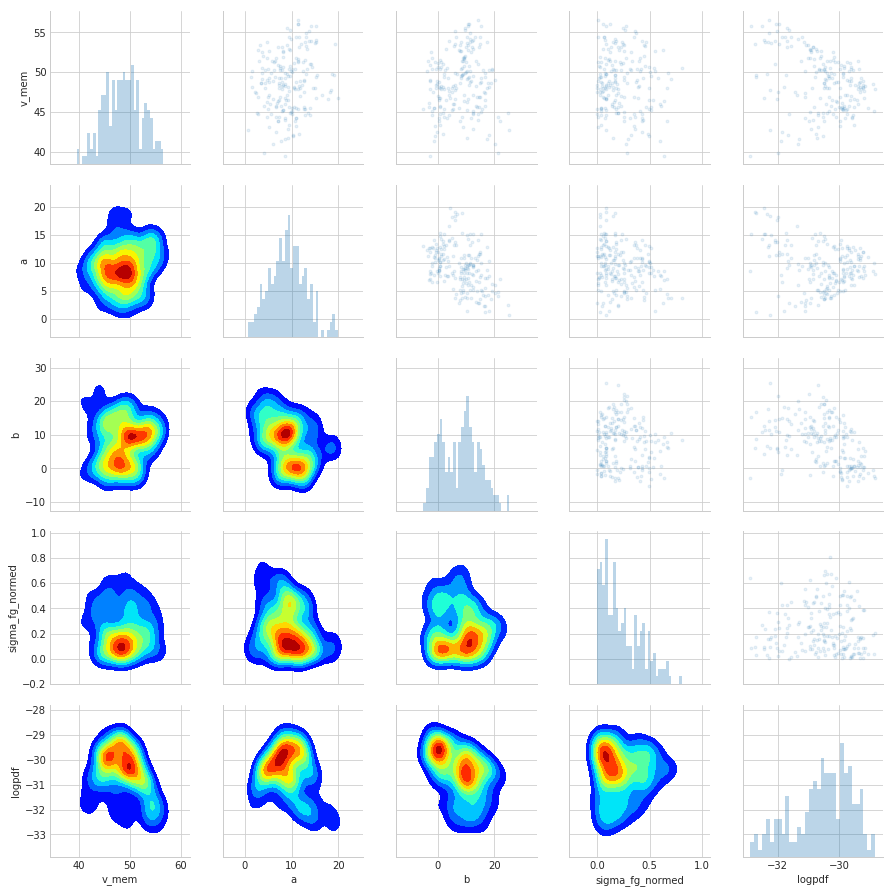

In [29]:
mcmc = gen.to_DataFrame()
mypairplot(mcmc[::100])

# Utils
## concatenate mocks

In [45]:
kind = "_flatten" # "", "_plummerlike", "_flatten"
ver = 2
n = 24
fnames = ["mock_tot{}_noMCMC_v00{}_{}.csv".format(kind,str(ver),i) for i in range(n)] 
dfs = [pd.read_csv(fname) for fname in fnames]
dfs_split = [dfs[2*i:2*i+1] for i in range(int(n/2))]
display(len(dfs_split))

12

In [46]:
dfs_new = [pd.concat(item) for item in dfs_split]
fnames_new =  ["mock_tot{}_noMCMC_v00{}_{}.csv".format(kind,str(ver+1),i) for i in range(int(n/2))] 
[df.to_csv(fname) for df,fname in zip(dfs_new,fnames_new)]
fnames_new

['mock_tot_flatten_noMCMC_v003_0.csv',
 'mock_tot_flatten_noMCMC_v003_1.csv',
 'mock_tot_flatten_noMCMC_v003_2.csv',
 'mock_tot_flatten_noMCMC_v003_3.csv',
 'mock_tot_flatten_noMCMC_v003_4.csv',
 'mock_tot_flatten_noMCMC_v003_5.csv',
 'mock_tot_flatten_noMCMC_v003_6.csv',
 'mock_tot_flatten_noMCMC_v003_7.csv',
 'mock_tot_flatten_noMCMC_v003_8.csv',
 'mock_tot_flatten_noMCMC_v003_9.csv',
 'mock_tot_flatten_noMCMC_v003_10.csv',
 'mock_tot_flatten_noMCMC_v003_11.csv']